In [63]:
import numpy as np
import pandas as pd
import os
import string

In [64]:
dataset = pd.read_csv("Flavia_features.csv")

In [65]:
dataset.head(5)

,Unnamed: 0,area,perimeter,physiological_length,physiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
0,0,197787.0,3479.036035,1416,759,1.865613,5.433846,61.195588,6.395667,13.643413,4.388007,24.025329,40.200931,21.448412,12.639656,0.997666,0.911738,1.688689
1,0,101297.0,2491.210239,1191,130,9.161538,1.528476,61.266656,7.049316,9.232018,10.876066,33.816205,37.382221,46.479230,8.137424,0.997191,0.944818,1.193795
2,0,86626.5,2291.511754,1096,119,9.210084,1.505590,60.616856,3.434303,6.371511,2.644757,19.975699,29.057374,19.275050,8.553729,0.996610,0.959023,0.848758
3,0,190481.0,2858.479352,1319,254,5.192913,1.758842,42.896164,7.670415,13.303599,6.049157,28.822885,40.221845,26.948604,8.440041,0.998419,0.914331,1.673915
4,0,228035.0,2920.420478,1325,286,4.632867,1.661806,37.401521,8.992028,16.671173,6.294281,30.967158,45.040198,28.595326,8.641438,0.998568,0.898644,1.968082


In [66]:
type(dataset)

pandas.core.frame.DataFrame

In [68]:
maindir = r'C:\Users\Chavan\Desktop\Akhilesh_Deo\project\Plant Monitoring\Module one code'
ds_path = maindir + "\\Leaves"
img_files = os.listdir(ds_path)

Creating target labels

Breakpoints are used alongside the image file to create a vector of target labels. The breakpoints are specified in Flavia leaves dataset website.


In [69]:
breakpoints = [1001,1059,1060,1122,1552,1616,1123,1194,1195,1267,1268,1323,1324,1385,1386,1437,1497,1551,1438,1496,2001,2050,2051,2113,2114,2165,2166,2230,2231,2290,2291,2346,2347,2423,2424,2485,2486,2546,2547,2612,2616,2675,3001,3055,3056,3110,3111,3175,3176,3229,3230,3281,3282,3334,3335,3389,3390,3446,3447,3510,3511,3563,3566,3621]

In [70]:
target_list = []
for file in img_files:
    target_num = int(file.split(".")[0])
    flag = 0
    i = 0 
    for i in range(0,len(breakpoints),2):
        if((target_num >= breakpoints[i]) and (target_num <= breakpoints[i+1])):
            flag = 1
            break
    if(flag==1):
        target = int((i/2))
        target_list.append(target)

In [71]:
y = np.array(target_list)
y

array([ 0,  0,  0, ..., 31, 31, 31])

In [73]:
X = dataset.iloc[:,1:]

In [74]:
X.head(5)

,area,perimeter,physiological_length,physiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
0,197787.0,3479.036035,1416,759,1.865613,5.433846,61.195588,6.395667,13.643413,4.388007,24.025329,40.200931,21.448412,12.639656,0.997666,0.911738,1.688689
1,101297.0,2491.210239,1191,130,9.161538,1.528476,61.266656,7.049316,9.232018,10.876066,33.816205,37.382221,46.479230,8.137424,0.997191,0.944818,1.193795
2,86626.5,2291.511754,1096,119,9.210084,1.505590,60.616856,3.434303,6.371511,2.644757,19.975699,29.057374,19.275050,8.553729,0.996610,0.959023,0.848758
3,190481.0,2858.479352,1319,254,5.192913,1.758842,42.896164,7.670415,13.303599,6.049157,28.822885,40.221845,26.948604,8.440041,0.998419,0.914331,1.673915
4,228035.0,2920.420478,1325,286,4.632867,1.661806,37.401521,8.992028,16.671173,6.294281,30.967158,45.040198,28.595326,8.641438,0.998568,0.898644,1.968082


In [75]:
y[0:5]

array([0, 0, 0, 0, 0])

In [76]:
from sklearn.model_selection import train_test_split


In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 142)

In [78]:
X_train.head(5)

,area,perimeter,physiological_length,physiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
147,816709.0,3599.604583,1101,1083,1.016620,1.459985,15.865079,36.740296,70.312759,25.082371,45.407495,81.168010,34.334657,22.519541,0.997333,0.649635,5.610553
837,921651.0,4100.217711,1379,1039,1.327238,1.554581,18.240945,34.696545,64.960450,23.699098,46.639467,69.345104,35.581559,92.360837,0.992630,0.560696,7.248010
358,552595.5,3851.400599,1398,1049,1.332698,2.653844,26.842938,29.863131,49.429785,23.717367,48.482326,77.064822,39.447077,23.181824,0.996204,0.751559,4.221778
962,38792.5,3037.410695,1177,822,1.431873,24.940233,237.825965,4.282973,5.213605,4.262034,27.772276,30.832113,28.934080,6.313081,0.993080,0.971889,0.634766
1101,941357.5,3719.822837,1303,988,1.318826,1.367561,14.699072,43.594426,72.467562,32.378145,47.408525,73.463708,37.026025,11.663863,0.998818,0.635070,6.042620


In [79]:
y_train[0:5]

array([ 3, 13,  6, 16, 18])

In [ ]:
#Feature Scaling

In [80]:
from sklearn.preprocessing import StandardScaler

In [81]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [82]:
X_train[0:2]

array([[ 0.83107439, -0.16626482, -0.88147185,  0.86194026, -0.95565321,
        -0.3402515 , -0.42761716,  0.01198242,  0.22802428, -0.06515913,
        -0.03038517,  0.66516332, -0.17255204, -0.17456543,  0.27446005,
        -0.97141039,  0.72845059],
       [ 1.22798679,  0.47033494,  0.26759454,  0.67696483, -0.45606003,
        -0.31922888, -0.37234499, -0.04156278,  0.1082232 , -0.10299271,
         0.04545738, -0.01456099, -0.11043539,  2.35360181, -1.92405705,
        -1.86068672,  1.74156052]])

In [83]:
y_train[0:2]

array([ 3, 13])

In [84]:
from sklearn import svm

In [85]:
clf = svm.SVC()
clf.fit(X_train,y_train)

SVC()

In [86]:
y_pred = clf.predict(X_test)

In [87]:
from sklearn import metrics

In [88]:
metrics.accuracy_score(y_test, y_pred)

0.7975567190226877

In [89]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.28      0.42        18
           1       0.62      0.72      0.67        18
           2       0.90      0.86      0.88        22
           3       0.81      0.96      0.88        27
           4       0.96      1.00      0.98        24
           5       0.94      1.00      0.97        16
           6       0.73      0.95      0.83        20
           7       0.83      0.71      0.77        14
           8       0.35      0.50      0.41        12
           9       0.93      0.93      0.93        15
          10       0.67      0.89      0.76        18
          11       0.92      0.61      0.73        18
          12       0.56      0.78      0.65        18
          13       0.94      0.71      0.81        24
          14       0.60      0.46      0.52        13
          15       0.44      0.22      0.30        18
          16       1.00      1.00      1.00        26
          17       0.89    

In [90]:
#Performing parameter tuning of the model
from sklearn.model_selection import GridSearchCV

In [91]:
parameters = [{'kernel': ['rbf'],
               'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5],
               'C': [1, 10, 100, 1000]},
              {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}
             ]

In [92]:
svm_clf = GridSearchCV(svm.SVC(decision_function_shape='ovr'), parameters, cv=5)
svm_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])

In [93]:
svm_clf.best_params_

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}

In [94]:
means = svm_clf.cv_results_['mean_test_score']
stds = svm_clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, svm_clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.060 (+/-0.037) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.197 (+/-0.019) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.599 (+/-0.043) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.829 (+/-0.060) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.841 (+/-0.053) for {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}
0.859 (+/-0.045) for {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
0.199 (+/-0.019) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.603 (+/-0.048) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.839 (+/-0.048) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.888 (+/-0.037) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.882 (+/-0.018) for {'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}
0.867 (+/-0.022) for {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}
0.603 (+/-0.054) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.840 (+/-0.046) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.889 (+/-0.025) for {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.886 (+/-0.010) for {'C': 100, 'gamma': 0.1, 'kernel':

In [95]:
y_pred_svm = svm_clf.predict(X_test)

In [96]:
metrics.accuracy_score(y_test, y_pred_svm)

0.8987783595113438

In [97]:
print(metrics.classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76        18
           1       0.83      0.83      0.83        18
           2       1.00      0.86      0.93        22
           3       0.96      0.93      0.94        27
           4       1.00      1.00      1.00        24
           5       0.94      1.00      0.97        16
           6       0.79      0.95      0.86        20
           7       0.92      0.86      0.89        14
           8       0.50      0.58      0.54        12
           9       1.00      1.00      1.00        15
          10       0.88      0.83      0.86        18
          11       0.88      0.78      0.82        18
          12       0.89      0.89      0.89        18
          13       0.79      0.79      0.79        24
          14       0.85      0.85      0.85        13
          15       0.68      0.72      0.70        18
          16       1.00      1.00      1.00        26
          17       0.94    

# Dimensionality Reduction using PCA


In [98]:
from sklearn.decomposition import PCA

In [99]:
pca = PCA()

In [100]:
pca.fit(X)

PCA()

In [101]:
var= pca.explained_variance_ratio_
var

array([9.99992850e-01, 6.46251555e-06, 3.92419534e-07, 2.07420737e-07,
       6.10351200e-08, 1.36319600e-08, 8.97313131e-09, 2.57947697e-09,
       8.58150014e-10, 2.05591583e-10, 1.06493729e-10, 1.30659098e-11,
       2.26592166e-12, 1.38328898e-12, 5.57713080e-13, 3.37427483e-15,
       1.00979648e-17])

In [102]:
import matplotlib.pyplot as plt
%matplotlib inline

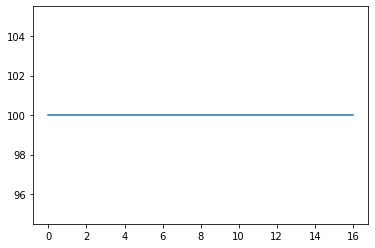

In [103]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(var1)

# Testing with mobile captured leaves which are not classified

In [104]:
import os
import cv2

In [115]:
def bg_sub(filename):
    test_img_path = '..\\Module one code\\'+filename
    main_img = cv2.imread(test_img_path)
    img = cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB)
    resized_image = cv2.resize(img, (1600, 1200))
    size_y,size_x,_ = img.shape
    gs = cv2.cvtColor(resized_image,cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gs, (55,55),0)
    ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    kernel = np.ones((50,50),np.uint8)
    closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)
    
    #ret_image,
    contours, hierarchy = cv2.findContours(closing,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
   # _,contours, hierarchy = cv2.findContours(closing,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    
    contains = []
    y_ri,x_ri, _ = resized_image.shape
    for cc in contours:
        yn = cv2.pointPolygonTest(cc,(x_ri//2,y_ri//2),False)
        contains.append(yn)

    val = [contains.index(temp) for temp in contains if temp>0]
    index = val[0]
    
    black_img = np.empty([1200,1600,3],dtype=np.uint8)
    black_img.fill(0)
    
    cnt = contours[index]
    mask = cv2.drawContours(black_img, [cnt] , 0, (255,255,255), -1)
    
    maskedImg = cv2.bitwise_and(resized_image, mask)
    white_pix = [255,255,255]
    black_pix = [0,0,0]
    
    final_img = maskedImg
    h,w,channels = final_img.shape
    for x in range(0,w):
        for y in range(0,h):
            channels_xy = final_img[y,x]
            if all(channels_xy == black_pix):
                final_img[y,x] = white_pix
    
    return final_img

In [116]:
filename = '1.jpeg' 
bg_rem_img = bg_sub(filename)

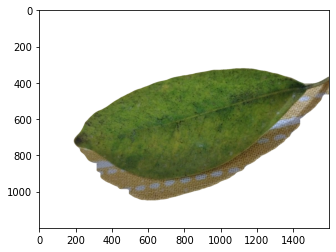

In [117]:
plt.imshow(bg_rem_img)

In [118]:
import mahotas as mt

In [133]:
def feature_extract(img):
    names = ['area','perimeter','pysiological_length','pysiological_width','aspect_ratio','rectangularity','circularity', \
             'mean_r','mean_g','mean_b','stddev_r','stddev_g','stddev_b', \
             'contrast','correlation','inverse_difference_moments','entropy'
            ]
    df = pd.DataFrame([], columns=names)

    #Preprocessing
    gs = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gs, (25,25),0)
    ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    kernel = np.ones((50,50),np.uint8)
    closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)

    #Shape features
    imag,contours = cv2.findContours(closing,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    cnt = contours[0]
    M = cv2.moments(cnt)
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt,True)
    x,y,w,h = cv2.boundingRect(cnt)
    aspect_ratio = float(w)/h
    rectangularity = w*h/area
    circularity = ((perimeter)**2)/area

    #Color features
    red_channel = img[:,:,0]
    green_channel = img[:,:,1]
    blue_channel = img[:,:,2]
    blue_channel[blue_channel == 255] = 0
    green_channel[green_channel == 255] = 0
    red_channel[red_channel == 255] = 0

    red_mean = np.mean(red_channel)
    green_mean = np.mean(green_channel)
    blue_mean = np.mean(blue_channel)

    red_std = np.std(red_channel)
    green_std = np.std(green_channel)
    blue_std = np.std(blue_channel)

    #Texture features
    textures = mt.features.haralick(gs)
    ht_mean = textures.mean(axis=0)
    contrast = ht_mean[1]
    correlation = ht_mean[2]
    inverse_diff_moments = ht_mean[4]
    entropy = ht_mean[8]

    vector = [area,perimeter,w,h,aspect_ratio,rectangularity,circularity,\
              red_mean,green_mean,blue_mean,red_std,green_std,blue_std,\
              contrast,correlation,inverse_diff_moments,entropy
             ]

    df_temp = pd.DataFrame([vector],columns=names)
    df = df.append(df_temp)
    
    return df


In [134]:
features_of_img = feature_extract(bg_rem_img)
features_of_img

error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-i1s8y2i1\opencv\modules\imgproc\src\moments.cpp:602: error: (-210:Unsupported format or combination of formats)  in function 'cv::moments'


In [86]:
scaled_features = sc_X.transform(features_of_img)
print(scaled_features)
# y_pred_mobile = svm_clf.predict(features_of_img)
y_pred_mobile = svm_clf.predict(scaled_features)
y_pred_mobile[0]

[[ 0.18461574 -0.13415507  0.38332784 -0.63467915  0.52202196 -0.31270435
  -0.32335954 -0.14723359 -0.55514161 -0.28622597 -0.03694852 -1.09119865
  -0.46301643  0.11823813  0.31796026  0.25634715 -0.00904433]]


11

In [87]:
common_names = ['pubescent bamboo','Chinese horse chestnut','Anhui Barberry', \
                'Chinese redbud','true indigo','Japanese maple','Nanmu',' castor aralia', \
                'Chinese cinnamon','goldenrain tree','Big-fruited Holly','Japanese cheesewood', \
                'wintersweet','camphortree','Japan Arrowwood','sweet osmanthus','deodar','ginkgo, maidenhair tree', \
                'Crape myrtle, Crepe myrtle','oleander','yew plum pine','Japanese Flowering Cherry','Glossy Privet',\
                'Chinese Toon','peach','Ford Woodlotus','trident maple','Beales barberry','southern magnolia',\
                'Canadian poplar','Chinese tulip tree','tangerine'
               ]
common_names[y_pred_mobile[0]]

'Japanese cheesewood'